In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange, CubicHermiteSpline # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Miguel Ángel Jaramillo Valencia

*Identificación:* 1000762075

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



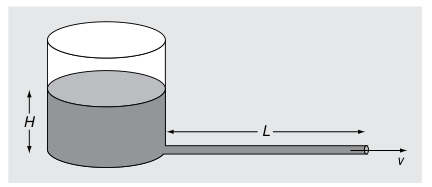

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [2]:
#a
def velocidad(H, L, T):
  g = 9.81
  return np.sqrt(2 * g * H) * np.tanh(np.sqrt(2 * g * H) / (2 * L) * T)

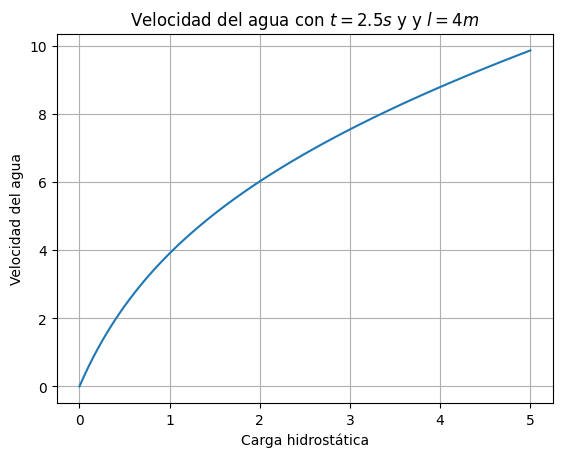

In [3]:
#b
g = 9.81
t = 2.5
l = 4
h = np.linspace(0,5,100)

plt.plot(h, velocidad(h,l,t))
plt.grid()
plt.title('Velocidad del agua con $t = 2.5s$ y y $l = 4m$')
plt.xlabel('Carga hidrostática')
plt.ylabel('Velocidad del agua')
plt.show()

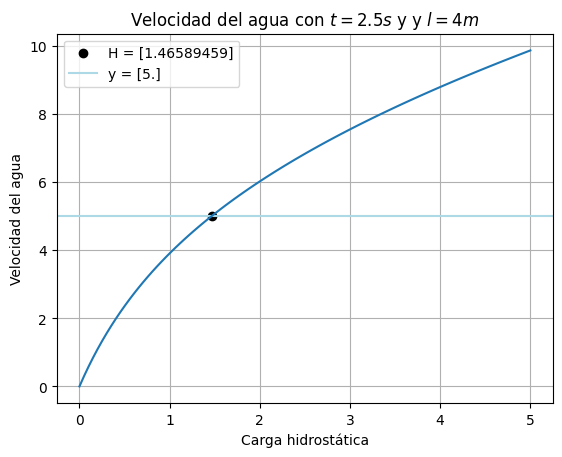

In [4]:
#c
V  = lambda h: np.sqrt(2 * g * h) * np.tanh(np.sqrt(2 * g * h) / (2 * l) * t)
V1 = lambda h: np.sqrt(2 * g * h) * np.tanh(np.sqrt(2 * g * h) / (2 * l) * t) - 5
raiz = fsolve(V1, 1)

plt.scatter(raiz, V(raiz), label = f'H = {raiz}', color = 'k')
plt.axhline(V(raiz), color = 'lightblue', label = f'y = {V(raiz)}')
plt.plot(h, V(h))
plt.grid()
plt.legend()
plt.title('Velocidad del agua con $t = 2.5s$ y y $l = 4m$')
plt.xlabel('Carga hidrostática')
plt.ylabel('Velocidad del agua')
plt.show()


Se observa que el H que se obtiene cuando la velocidad es 5 m/s es 1.465

In [5]:
#d
def bisect(f, a, b, tol):

  while(b - a)/ 2 > tol:

    c = (a + b) / 2

    if f(c) == 0:
      return c

    elif f(a) * f(c) < 0:
      b = c

    else: a = c
  return (a + b) / 2

bisect(V1, 0, 5, 1e-7)

1.465894654393196

Con el método se obtiene un resultado similar al obtenido usando fsolve

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [6]:
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

In [7]:
#a
def diff_fwd(c, t):

  return np.array([(c[i + 1] - c[i])/ (t[i+1] - t[0] ) for i in range(len(c) -1 )])

def diff_bwd(c, t):

   return np.array([(c[i] - c[i - 1])/ (t[i] - t[i-1]) for i in range(1,len(c))])

def diff_cen(c, t):

  return np.array([(c[i + 1] - c[i - 1]) / (2 * (t[i+1] - t[i-1])) for i in range(1, len(c)-1)])


In [8]:
deri = np.zeros(len(c))

deri[0] = diff_fwd(c,t)[0]
deri[-1] = diff_bwd(c,t)[-1]
deri[1:-1] = diff_cen(c,t)
deri

array([-0.104  , -0.04425, -0.03125, -0.022  , -0.0155 , -0.026  ])

Text(0, 0.5, '$dc/dt$')

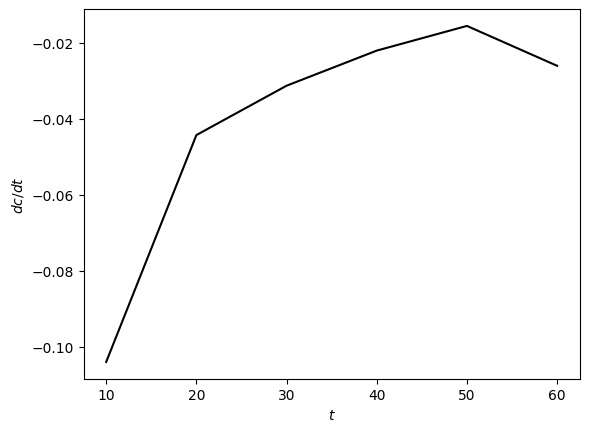

In [9]:
plt.plot(t, deri ,color = 'k')
plt.xlabel('$t$')
plt.ylabel('$dc/dt$')

In [19]:
#b
grad = np.gradient(c,t)
error = abs(deri - np.gradient(c,t))
print('el error para cada uno de los valores es:', error)

el error para cada uno de los valores es: [0.199   0.13075 0.10325 0.0835  0.07    0.078  ]


# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




In [12]:
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
derivada = np.gradient(c,t)
derivada

array([0.095 , 0.0865, 0.072 , 0.0615, 0.0545, 0.052 ])

Text(0.5, 1.0, 'C en función de t')

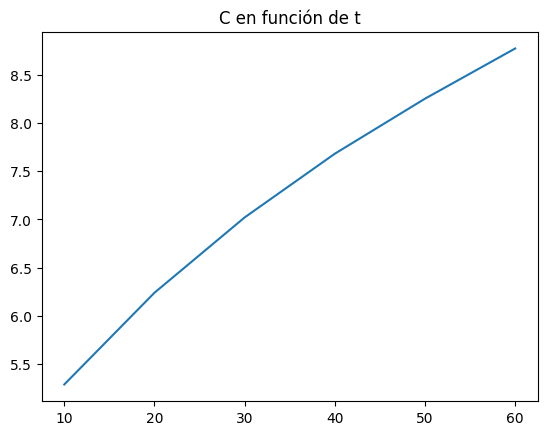

In [13]:
plt.plot(t, c)
plt.title('C en función de t')

In [14]:
P = lagrange(t, c)
poly_lagrange = np.poly1d(P)
print(poly_lagrange, P(t))

         5             4             3            2
2.5e-09 x - 4.583e-07 x + 3.792e-05 x - 0.002204 x + 0.1407 x + 4.07 [5.29 6.24 7.02 7.68 8.25 8.77]


In [15]:
H = CubicHermiteSpline(t, c, grad)
H(t)

array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

In [16]:
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
derivative

Polynomial([ 1.40683333e-01, -4.40833333e-03,  1.13750000e-04, -1.83333333e-06,
        1.25000000e-08], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

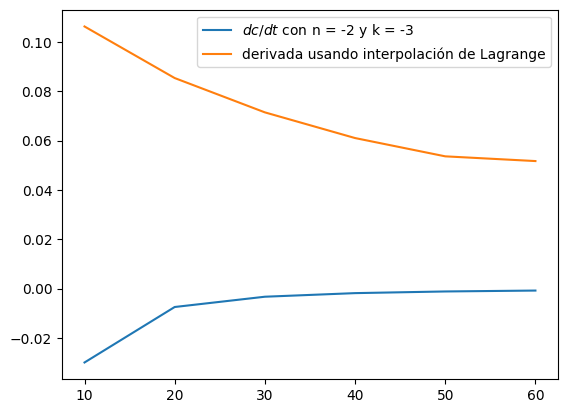

In [17]:
dc_dt = lambda c: -3 * (c **-2.0)

plt.plot(t, dc_dt(t), label = '$dc/dt$ con n = -2 y k = -3')
plt.plot(t, derivative(t), label = 'derivada usando interpolación de Lagrange')
plt.legend()
plt.show()

Text(0, 0.5, 'error')

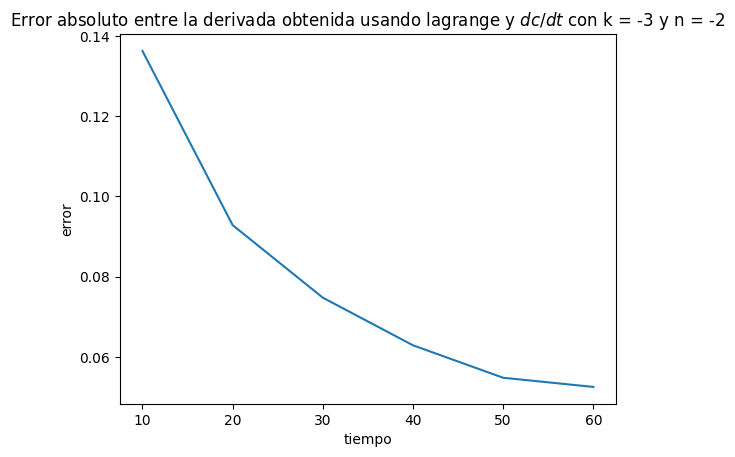

In [18]:
plt.plot(t, abs(dc_dt(t) - derivative(t)))
plt.title('Error absoluto entre la derivada obtenida usando lagrange y $dc/dt$ con k = -3 y n = -2')
plt.xlabel('tiempo')
plt.ylabel('error')